In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv("apps.csv")

In [3]:
df.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## Data cleaning

In [5]:
df.isnull().sum()    # checking null values in my data_set

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
df.shape

(9659, 14)

In [7]:
df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
# Remove 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

In [9]:
# Convert 'Price' to numeric
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [10]:
# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [11]:
# Convert 'Size' to numeric
df['Size'] = df['Size'].str.replace('M','').astype(float)

In [12]:
# Fill null values in 'Rating' column with the mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [13]:
# Fill null values in 'Size' column with the mean
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [14]:
df.dropna(inplace=True)  # drop all remaining missing values

In [15]:
df.isnull().sum() # again check 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
df.info() # all information about data_set

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9648 non-null   object        
 1   Category        9648 non-null   object        
 2   Rating          9648 non-null   float64       
 3   Reviews         9648 non-null   int64         
 4   Size            9648 non-null   float64       
 5   Installs        9648 non-null   object        
 6   Type            9648 non-null   object        
 7   Price           9648 non-null   float64       
 8   Content Rating  9648 non-null   object        
 9   Genres          9648 non-null   object        
 10  Last Updated    9648 non-null   datetime64[ns]
 11  Current Ver     9648 non-null   object        
 12  Android Ver     9648 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.0+ MB


In [17]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Describe the numerical columns for the statistical information
df[numerical_cols.columns].describe()

,Rating,Reviews,Size,Price
count,9648.000000,9.648000e+03,9648.000000,9648.000000
mean,4.173309,2.168369e+05,20.411575,1.100193
std,0.494475,1.832349e+06,20.398666,16.861727
min,1.000000,0.000000e+00,0.008500,0.000000
25%,4.000000,2.500000e+01,5.300000,0.000000
50%,4.200000,9.690000e+02,16.000000,0.000000
75%,4.500000,2.944925e+04,25.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


## Descriptive Statistics (mean, median, mode, standard deviation)

In [18]:
data = df.select_dtypes(include="number").iloc[:, 1:].agg(['mean', 'median', lambda x: x.mode()[0], 'std']).T
data.columns = ["Mean", "Median", "Mode", "Std"]

In [19]:
data

,Mean,Median,Mode,Std
Reviews,216836.931281,969.0,0.000000,1.832349e+06
Size,20.411575,16.0,20.395289,2.039867e+01
Price,1.100193,0.0,0.000000,1.686173e+01


In [20]:
# Calculate the number of apps in each category
category_counts = df['Category'].value_counts()


print(category_counts)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


## Sentiment Analysis:

### **Analyzing text data to determine the emotional tone, whether positive,negative, or neutral.**

In [23]:
import nltk
from textblob import TextBlob

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['App'].apply(get_sentiment)

# View the results
print(df['Sentiment'].value_counts())


Sentiment
Neutral     7877
Positive    1398
Negative     373
Name: count, dtype: int64


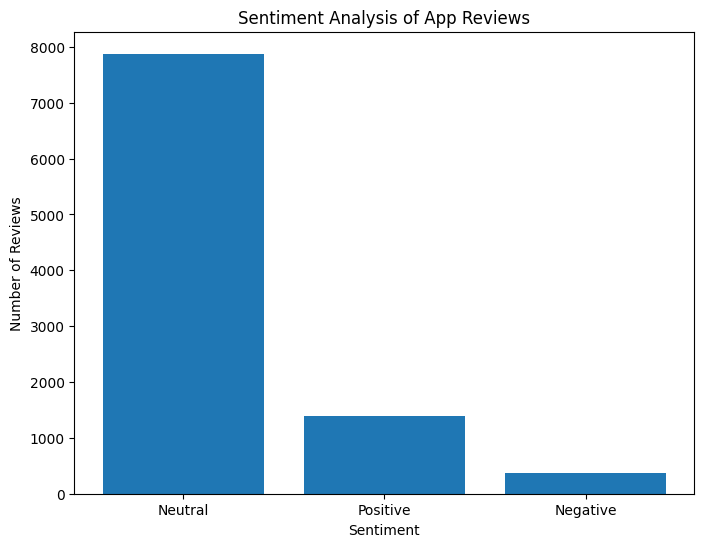

In [26]:
# Plot the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Analysis of App Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


## Natural Language Processing (NLP): 

### Utilizing algorithms and models to understand and process human language

In [27]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Neutral
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Neutral
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Positive
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Neutral
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Neutral


In [28]:
from collections import Counter

In [31]:
# Preprocess the 'App' column
app_names = df['App'].tolist()
words = []
for app_name in app_names:
  # Tokenize the app name into individual words
  tokens = nltk.word_tokenize(app_name)
  # Remove stop words and punctuation
  stop_words = set(nltk.corpus.stopwords.words('english'))
  words.extend([token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words])
    

In [32]:
# Analyze word frequency
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)

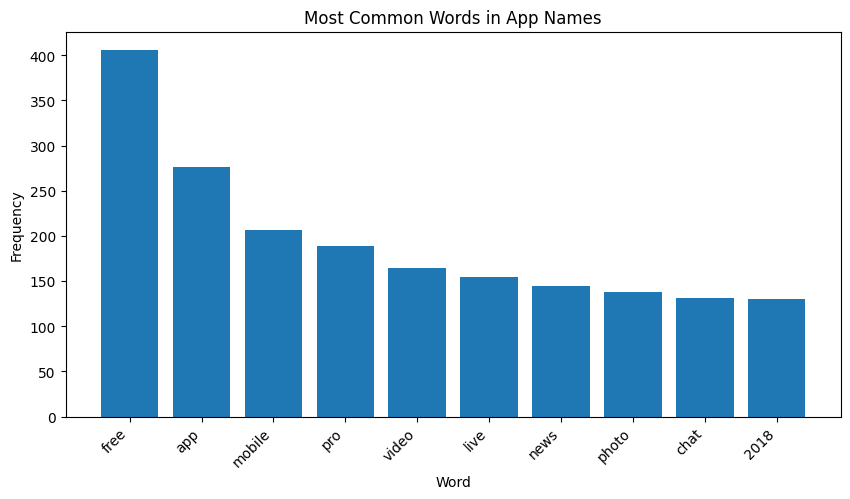

In [33]:
# Plot word frequency
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in App Names')
plt.xticks(rotation=45, ha='right')
plt.show()

## Machine Learning Algorithms: 

### Implementing models for sentiment classification, such as Support Vector Machines, Naive Bayes, or deep learning architectures.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [35]:
X = df['App']  
y = df['Sentiment']

In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [38]:

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [39]:
# Make predictions with the SVM model
svm_predictions = svm_model.predict(X_test_tfidf)

In [47]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9585492227979274


In [46]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

    Negative       0.92      0.65      0.77        75
     Neutral       0.96      1.00      0.98      1604
    Positive       0.95      0.81      0.88       251

    accuracy                           0.96      1930
   macro avg       0.95      0.82      0.87      1930
weighted avg       0.96      0.96      0.96      1930



In [41]:
# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [42]:
# Make predictions with the Naive Bayes model
nb_predictions = nb_model.predict(X_test_tfidf)

In [45]:
# Evaluate the Naive Bayes model
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("\nNaive Bayes Accuracy:", nb_accuracy)



Naive Bayes Accuracy: 0.8585492227979274


In [44]:
print(classification_report(y_test, nb_predictions))

              precision    recall  f1-score   support

    Negative       1.00      0.01      0.03        75
     Neutral       0.86      1.00      0.92      1604
    Positive       0.95      0.21      0.35       251

    accuracy                           0.86      1930
   macro avg       0.93      0.41      0.43      1930
weighted avg       0.87      0.86      0.81      1930



# Feature Engineering:

### Identifying and extracting relevant features from text data to enhance model performance.

In [48]:
import re

In [49]:
def extract_features(text):

  features = {}
  features['length'] = len(text)
  features['num_words'] = len(text.split())
  features['contains_number'] = bool(re.search(r'\d', text))
  # Add more features as needed (e.g., presence of specific keywords, etc.)
  return features

In [50]:
# Apply feature extraction to the 'App' column
df['Features'] = df['App'].apply(extract_features)

In [51]:
# Expand the features dictionary into separate columns
df = pd.concat([df, pd.json_normalize(df['Features'])], axis=1)

In [52]:
X = df[['App', 'length', 'num_words', 'contains_number']]  # Use features along with app name
y = df['Sentiment']


In [54]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment,Features,length,num_words,contains_number
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,Neutral,"{'length': 46, 'num_words': 9, 'contains_numbe...",46.0,9.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,Neutral,"{'length': 19, 'num_words': 3, 'contains_numbe...",19.0,3.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,Positive,"{'length': 50, 'num_words': 10, 'contains_numb...",50.0,10.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,Neutral,"{'length': 21, 'num_words': 5, 'contains_numbe...",21.0,5.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,Neutral,"{'length': 37, 'num_words': 7, 'contains_numbe...",37.0,7.0,False


# Data Visualization

###  Presenting sentiment analysis results through effective visualizations for clear interpretation.

In [55]:
# Count the number of apps in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

In [56]:
sentiment_counts

Sentiment
Neutral     7877
Positive    1398
Negative     373
Name: count, dtype: int64

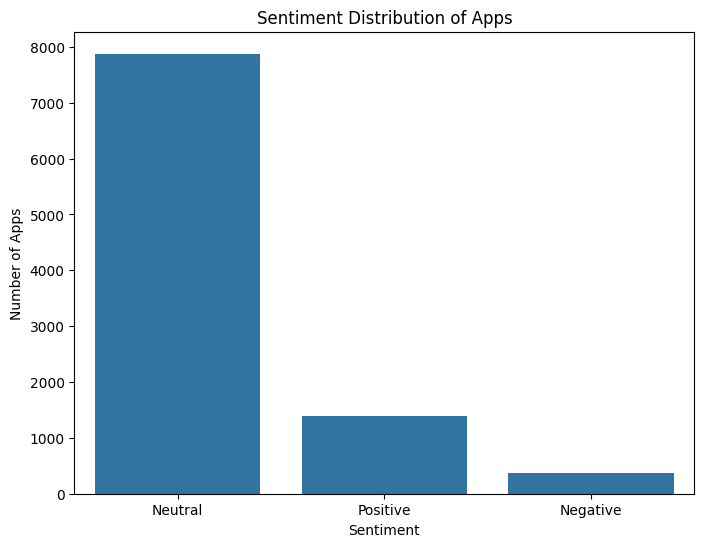

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Sentiment Distribution of Apps')
plt.xlabel('Sentiment')
plt.ylabel('Number of Apps')
plt.show()


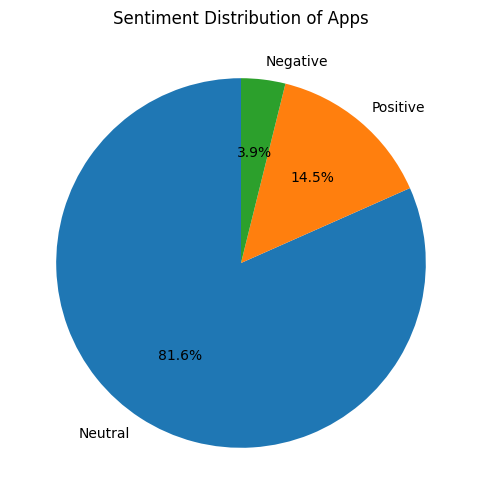

In [58]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution of Apps')
plt.show()

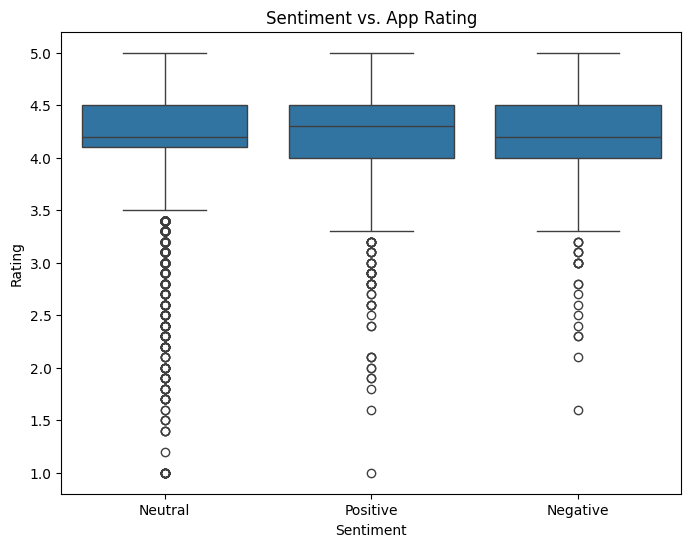

In [59]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='Rating', data=df)
plt.title('Sentiment vs. App Rating')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.show()


# Analytical report

### This report analyzes the sentiment of app names from the provided dataset. We aim to understand the overall sentiment distribution and explore potential relationships between sentiment and other app characteristics.


### The dataset contains information about various apps, including their names. We performed sentiment analysis on the 'App' column using TextBlob, categorizing each app name into 'Positive', 'Neutral', or 'Negative' sentiment.

# Download cleaned csv data

In [60]:
df['cleaned_apps.csv'] = df.to_csv('cleaned_apps.csv', index=False)